<a href="https://colab.research.google.com/github/breeNep/mineriaDatos/blob/main/MD_1910_05PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
! ls -la

total 20
drwxr-xr-x 1 root root 4096 Oct 16 17:47 .
drwxr-xr-x 1 root root 4096 Oct 16 17:44 ..
-rw-r--r-- 1 root root 2095 Oct 16 17:47 ConcentradoPromedios.csv
drwxr-xr-x 4 root root 4096 Oct 13 13:21 .config
drwxr-xr-x 1 root root 4096 Oct 13 13:22 sample_data


In [ ]:
df = pd.read_csv('ConcentradoPromedios.csv', index_col="ID")
df

,ESP,HIS,EDFI,ING,ART,MAT,BIO,GEO,CIV,COM,TESE,INT C.,REL,PROMEDIO
ID,,,,,,,,,,,,,,
1,10.0,10.0,10.0,9.5,10.0,9.2,9.8,9,10.0,10,10.0,10.0,10.0,9.81
2,7.4,10.0,7.5,8.3,8.7,5.0,5.0,9,10.0,8,10.0,10.0,7.2,8.16
3,9.8,10.0,8.0,9.0,7.7,10.0,9.7,9,10.0,8,10.0,10.0,7.6,9.14
4,10.0,10.0,10.0,9.0,10.0,9.7,9.7,10,10.0,10,10.0,10.0,9.1,9.81
5,9.5,10.0,10.0,9.0,9.6,8.1,9.9,9,10.0,10,10.0,10.0,9.2,9.56
6,9.4,8.5,8.0,9.3,9.5,6.6,9.8,8,10.0,10,10.0,10.0,10.0,9.16
7,8.3,8.5,7.5,8.7,8.2,7.4,8.9,7,8.3,10,10.0,10.0,9.0,8.60
8,9.3,10.0,9.0,8.8,8.4,8.6,9.6,9,10.0,8,10.0,10.0,9.4,9.24
9,8.7,8.5,9.0,9.2,7.7,8.9,9.7,8,10.0,10,8.5,8.5,7.7,8.80


In [ ]:
#Normalizar datos
scaler= StandardScaler()
scaled_array = scaler.fit_transform(df)
print(scaled_array)
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

[[ 1.02592899e+00  4.56435465e-01  9.80161893e-01  8.78646005e-01
   1.58011783e+00  6.48025528e-01  5.76327713e-01  6.11592840e-01
   2.12173149e-01  5.71428571e-01  4.01582705e-01  3.68421053e-01
   8.35623405e-01  1.22287625e+00]
 [-1.52052960e+00  4.56435465e-01 -1.63360315e+00 -4.56006155e-01
   1.87471606e-01 -2.68127994e+00 -3.99618968e+00  6.11592840e-01
   2.12173149e-01 -2.28571429e+00  4.01582705e-01  3.68421053e-01
  -1.49248160e+00 -1.74112789e+00]
 [ 8.30047559e-01  4.56435465e-01 -1.11085014e+00  3.22540939e-01
  -8.83794716e-01  1.28217895e+00  4.81066934e-01  6.11592840e-01
   2.12173149e-01 -2.28571429e+00  4.01582705e-01  3.68421053e-01
  -1.15989517e+00  1.93109360e-02]
 [ 1.02592899e+00  4.56435465e-01  9.80161893e-01  3.22540939e-01
   1.58011783e+00  1.04437142e+00  4.81066934e-01  1.48529690e+00
   2.12173149e-01  5.71428571e-01  4.01582705e-01  3.68421053e-01
   8.73039379e-02  1.22287625e+00]
 [ 5.36225414e-01  4.56435465e-01  9.80161893e-01  3.22540939e-01
  

In [ ]:
scaled_df

,ESP,HIS,EDFI,ING,ART,MAT,BIO,GEO,CIV,COM,TESE,INT C.,REL,PROMEDIO
0,1.025929,0.456435,0.980162,0.878646,1.580118,0.648026,0.576328,0.611593,0.212173,0.571429,0.401583,0.368421,0.835623,1.222876
1,-1.520530,0.456435,-1.633603,-0.456006,0.187472,-2.681280,-3.996190,0.611593,0.212173,-2.285714,0.401583,0.368421,-1.492482,-1.741128
2,0.830048,0.456435,-1.110850,0.322541,-0.883795,1.282179,0.481067,0.611593,0.212173,-2.285714,0.401583,0.368421,-1.159895,0.019311
3,1.025929,0.456435,0.980162,0.322541,1.580118,1.044371,0.481067,1.485297,0.212173,0.571429,0.401583,0.368421,0.087304,1.222876
4,0.536225,0.456435,0.980162,0.322541,1.151611,-0.223935,0.671588,0.611593,0.212173,0.571429,0.401583,0.368421,0.170451,0.773785
5,0.438285,-2.282177,-1.110850,0.656204,1.044485,-1.412973,0.576328,-0.262111,0.212173,0.571429,0.401583,0.368421,0.835623,0.055238
6,-0.639063,-2.282177,-1.633603,-0.011122,-0.348162,-0.778820,-0.281019,-1.135815,-6.060772,0.571429,0.401583,0.368421,0.004157,-0.950727
7,0.340344,0.456435,-0.065344,0.100099,-0.133908,0.172410,0.385806,0.611593,0.212173,-2.285714,0.401583,0.368421,0.336744,0.198948
8,-0.247300,-2.282177,-0.065344,0.544983,-0.883795,0.410218,0.481067,-0.262111,0.212173,0.571429,-1.152931,-1.210526,-1.076749,-0.591454
9,-0.443182,0.456435,-1.110850,-0.900890,-1.098048,-0.541012,-2.090974,-1.135815,0.212173,0.571429,-1.152931,-1.210526,-0.162136,-1.274073


In [ ]:
#Aplicar PCA
pca = PCA()
principalComponets = pca.fit_transform(scaled_array)
principalComponets

array([[-2.81015068e+00,  3.98812941e-01,  6.00396927e-02,
        -1.05137984e+00,  4.09509559e-01,  7.10886268e-02,
         1.29618624e-01,  4.52910472e-03, -1.15360957e-01,
        -2.97008563e-01,  1.42843106e-01,  1.47133319e-02,
        -4.49010233e-02, -4.14366573e-03],
       [ 4.06554505e+00, -1.88251236e+00, -3.27964262e+00,
        -1.52210754e+00, -1.34745546e+00,  1.66094347e+00,
         5.34521678e-01, -1.26967168e+00, -2.16100151e-01,
        -1.84437776e-02,  3.50813006e-01, -2.60033093e-02,
         4.63910071e-02,  2.15240604e-03],
       [-3.66539275e-01, -9.55793801e-01, -1.75399524e+00,
         1.17665839e+00, -1.57347515e+00, -1.63913549e+00,
        -5.25691625e-01,  4.87742937e-01,  6.15646342e-01,
         1.13019859e-01,  3.16841520e-01,  7.07218216e-01,
         5.32415855e-03,  5.34872333e-04],
       [-2.74011008e+00,  5.09350477e-01, -4.05283440e-01,
        -6.92692815e-01,  3.05591254e-02,  1.34493370e-02,
         5.67415988e-01,  4.11208355e-01, -3.

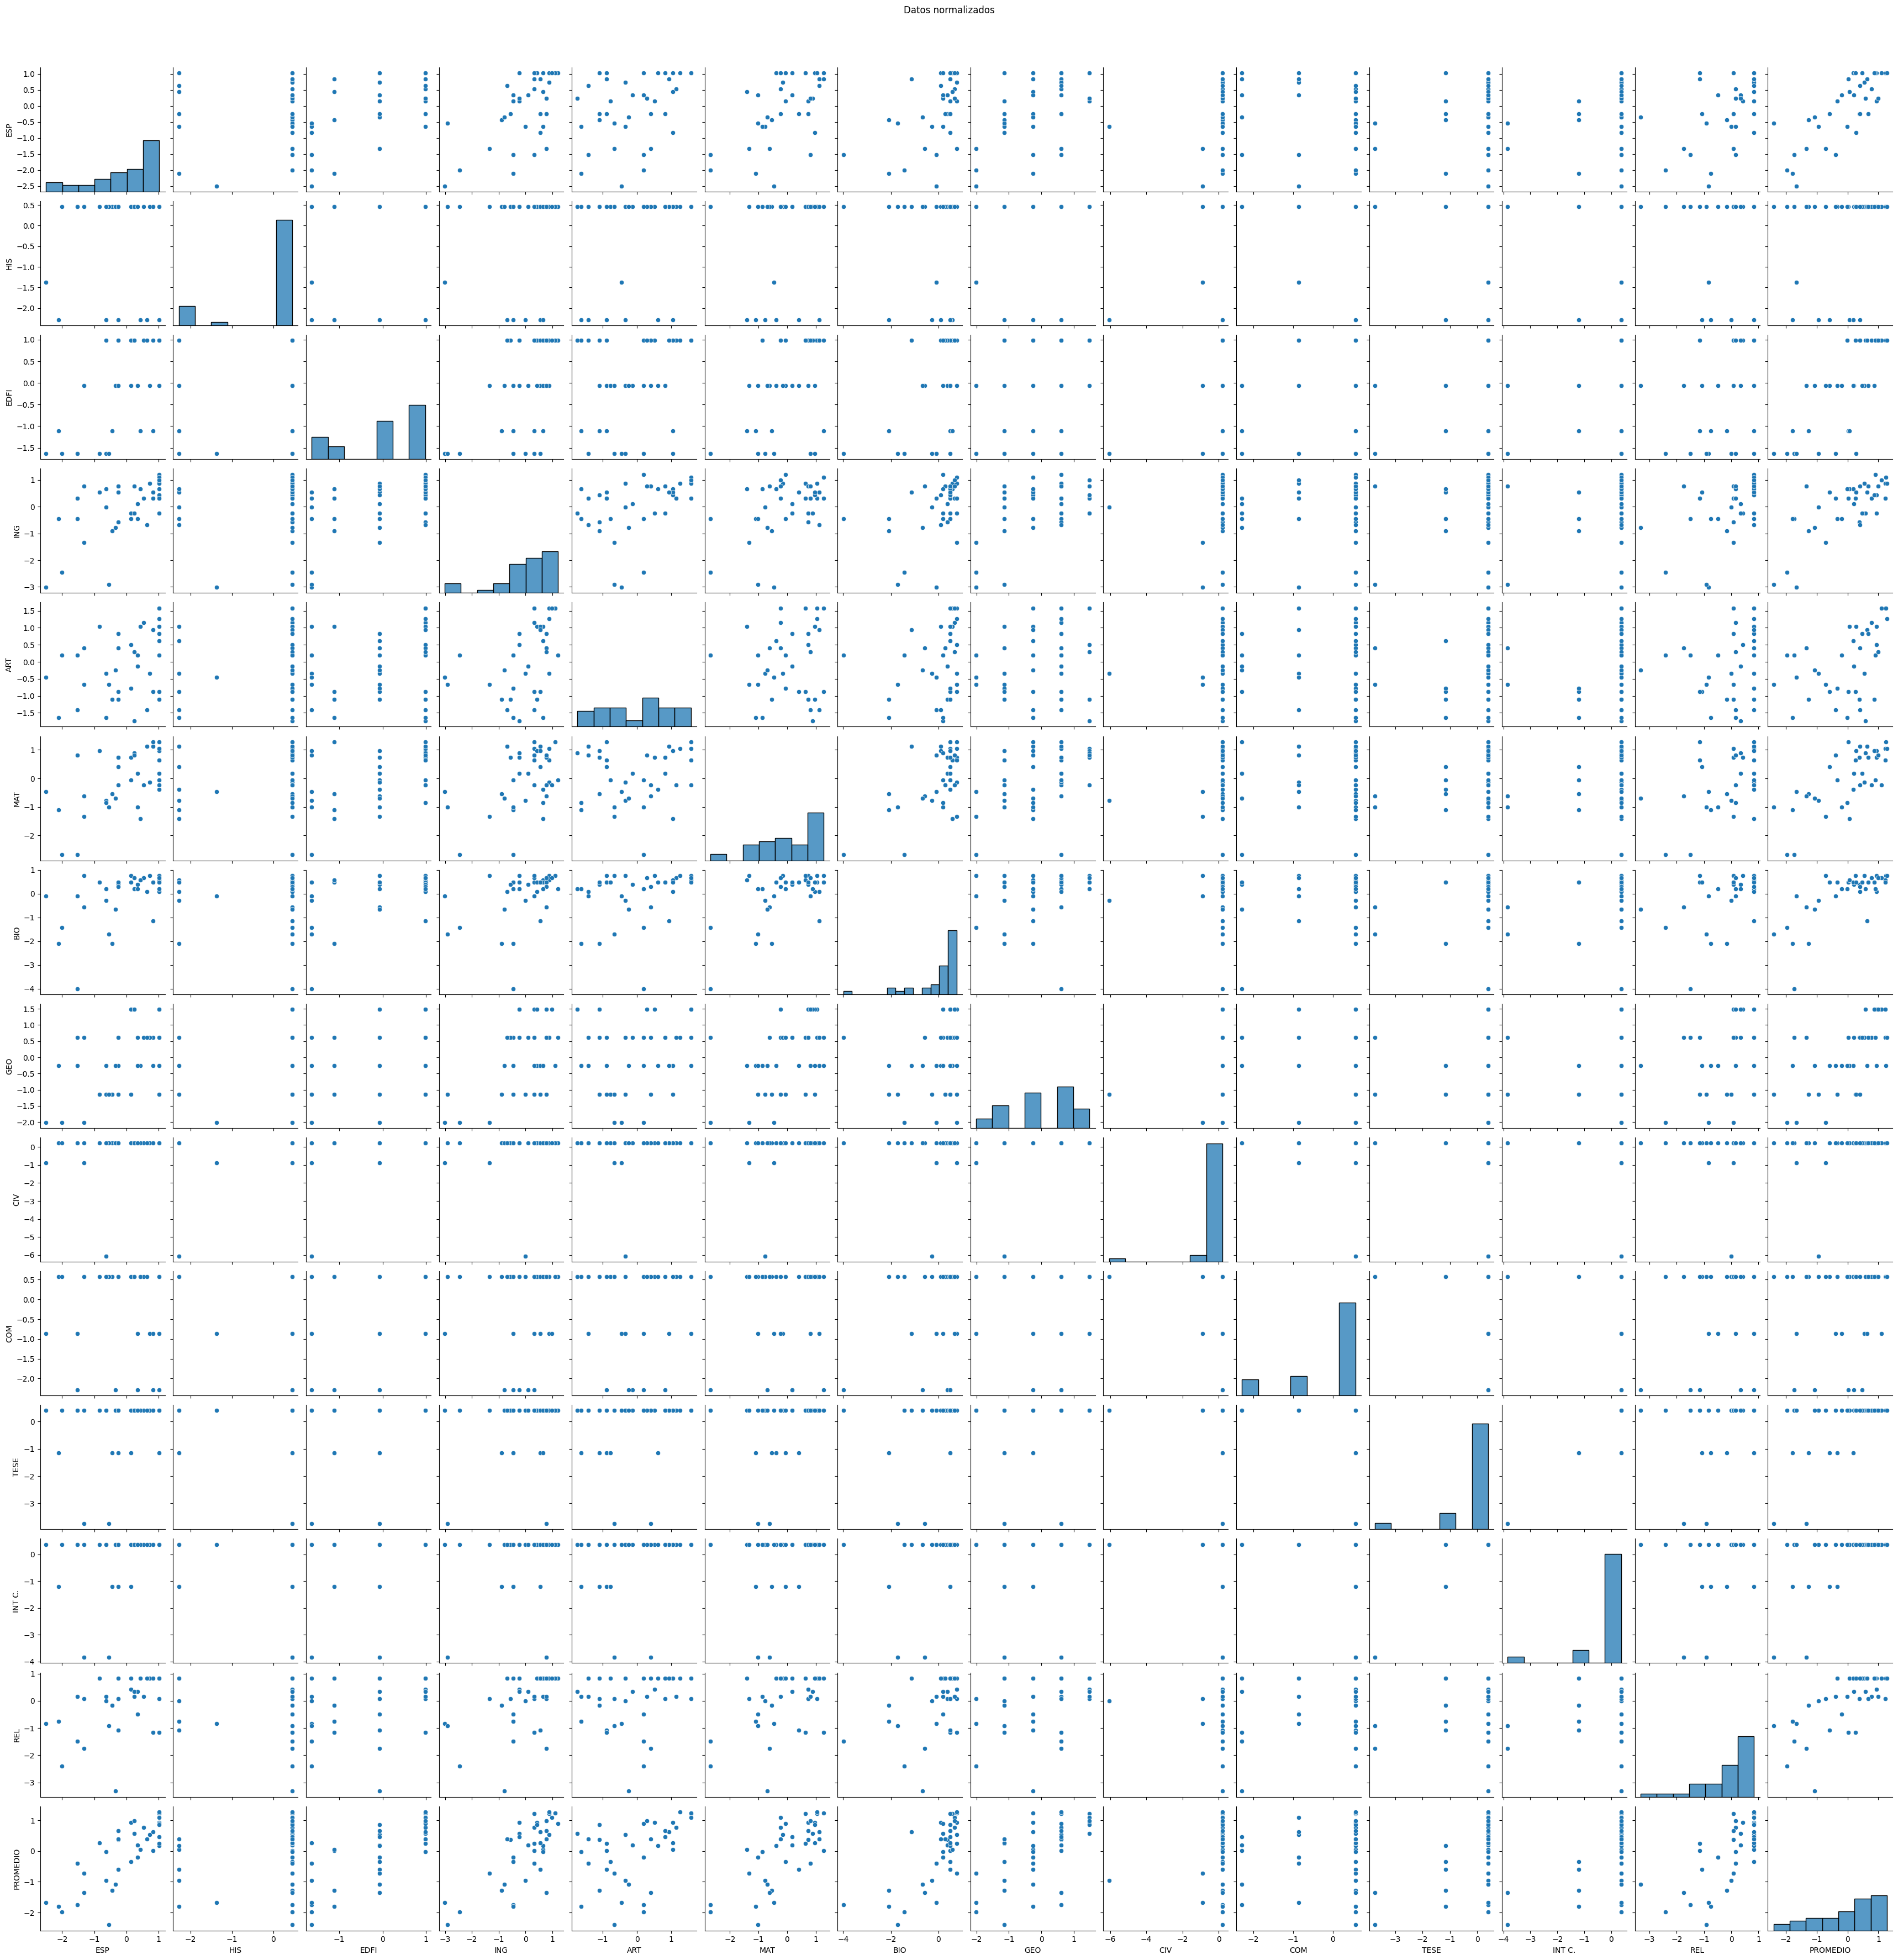

In [ ]:
#Vizualizamos los datos normalizados
sns.pairplot(scaled_df)
plt.suptitle("Datos normalizados", y=1.02)
plt.show()

In [ ]:
#Generar la matriz de coovarianza (los valores propios y los vectores propios)
cov_matrix = np.cov(scaled_array.T)
eigenvalues, eigenvector = np.linalg.eig(cov_matrix)

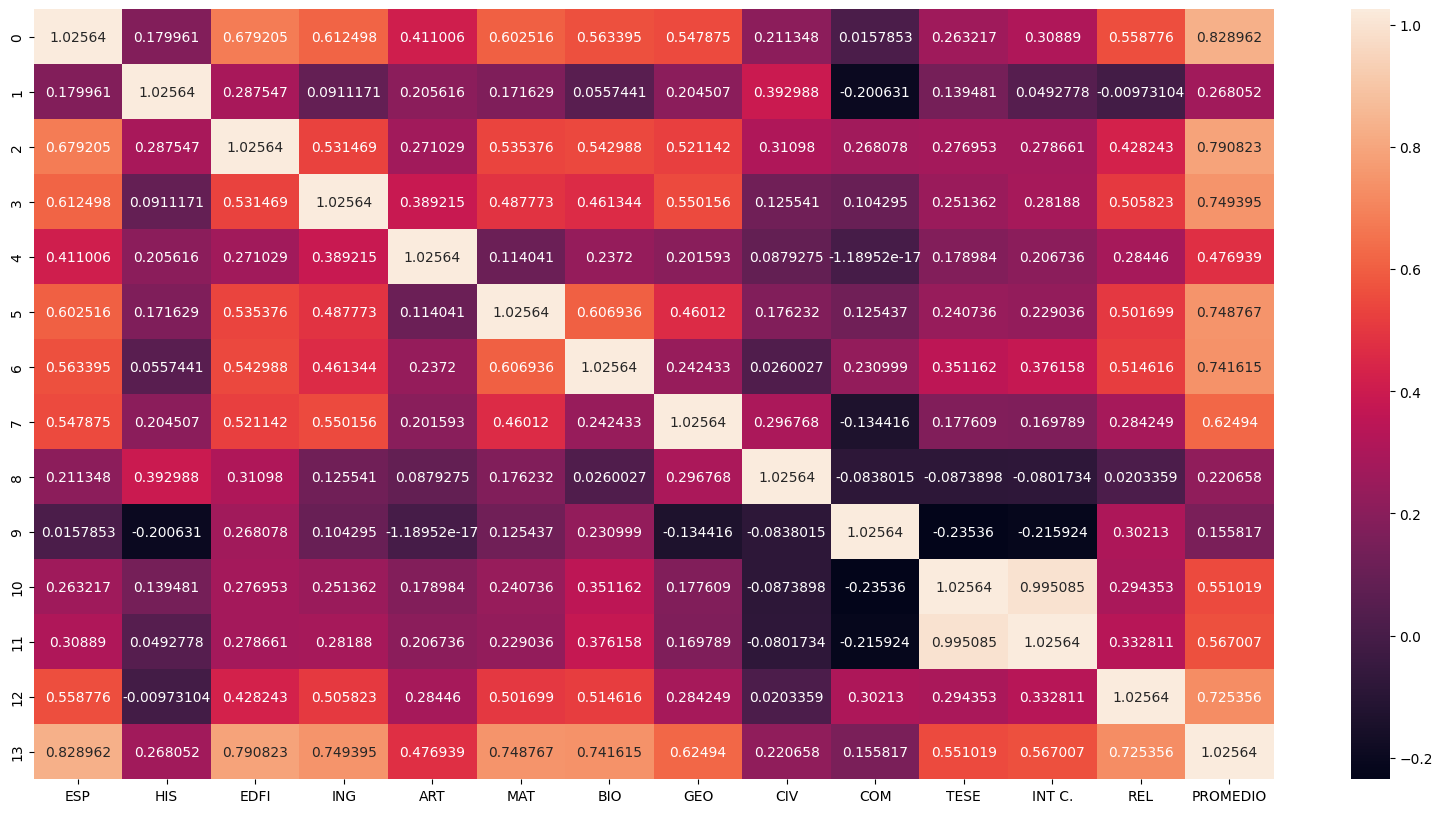

In [ ]:
#Graficar la matriz de covarianza en un mapa de calor
plt.figure(figsize=(20,10))
sns.heatmap(pd.DataFrame(cov_matrix, columns=df.columns), annot=True, fmt='g')
plt.show()

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.05710188e-01, 1.31849455e-01, 1.17874450e-01, 6.82869608e-02,
       6.43012766e-02, 4.51866184e-02, 3.96370100e-02, 3.60999823e-02,
       2.90369006e-02, 2.52880762e-02, 2.13930353e-02, 1.37951058e-02,
       1.53992084e-03, 1.02078432e-06])

Text(0.5, 1.0, 'Varianza explicada por cada componente principal')

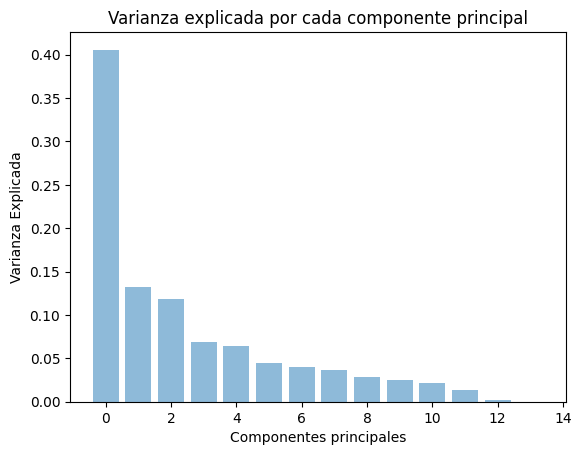

In [ ]:
#Vizualizar la varianza explicada
plt.bar(range(len(explained_variance)), explained_variance, align='center', alpha=0.5)
plt.ylabel('Varianza Explicada')
plt.xlabel('Componentes principales')
plt.title('Varianza explicada por cada componente principal')

In [ ]:
num_pc = 3
final_pca = PCA(n_components=num_pc)
final_data = final_pca.fit_transform(scaled_array)
final_data

array([[-2.81015068e+00,  3.98812941e-01,  6.00396927e-02],
       [ 4.06554505e+00, -1.88251236e+00, -3.27964262e+00],
       [-3.66539275e-01, -9.55793801e-01, -1.75399524e+00],
       [-2.74011008e+00,  5.09350477e-01, -4.05283440e-01],
       [-1.76567584e+00,  1.58638885e-01, -1.49869809e-01],
       [-9.99314144e-02, -6.97426992e-01,  1.69206183e+00],
       [ 2.49065128e+00, -2.93073836e+00,  4.55877625e+00],
       [-7.51936883e-01, -9.51163409e-01, -1.50067196e+00],
       [ 1.19674015e+00,  1.45515421e+00,  1.47595123e+00],
       [ 3.11885352e+00,  1.12990830e+00, -1.73290106e-01],
       [ 7.66506876e-01,  1.49113349e+00,  7.35216922e-01],
       [ 3.04274379e+00,  4.65119692e+00, -6.13508853e-01],
       [-2.17337915e+00,  2.75467692e-01,  2.13153492e-01],
       [-2.02140606e+00,  3.27079391e-01, -1.64685388e-01],
       [-5.61187903e-01,  6.17522869e-01,  1.81411950e+00],
       [-1.46230807e+00, -3.94241663e-01, -4.89227334e-01],
       [-8.02084334e-01,  1.22820454e-01

In [ ]:
#Vizualizar los PC
final_df = pd.DataFrame(final_data, columns=[f'PC{i}' for i in range(1, num_pc+1)])
final_df

,PC1,PC2,PC3
0,-2.810151,0.398813,0.060040
1,4.065545,-1.882512,-3.279643
2,-0.366539,-0.955794,-1.753995
3,-2.740110,0.509350,-0.405283
4,-1.765676,0.158639,-0.149870
5,-0.099931,-0.697427,1.692062
6,2.490651,-2.930738,4.558776
7,-0.751937,-0.951163,-1.500672
8,1.196740,1.455154,1.475951
9,3.118854,1.129908,-0.173290


<function matplotlib.pyplot.show(close=None, block=None)>

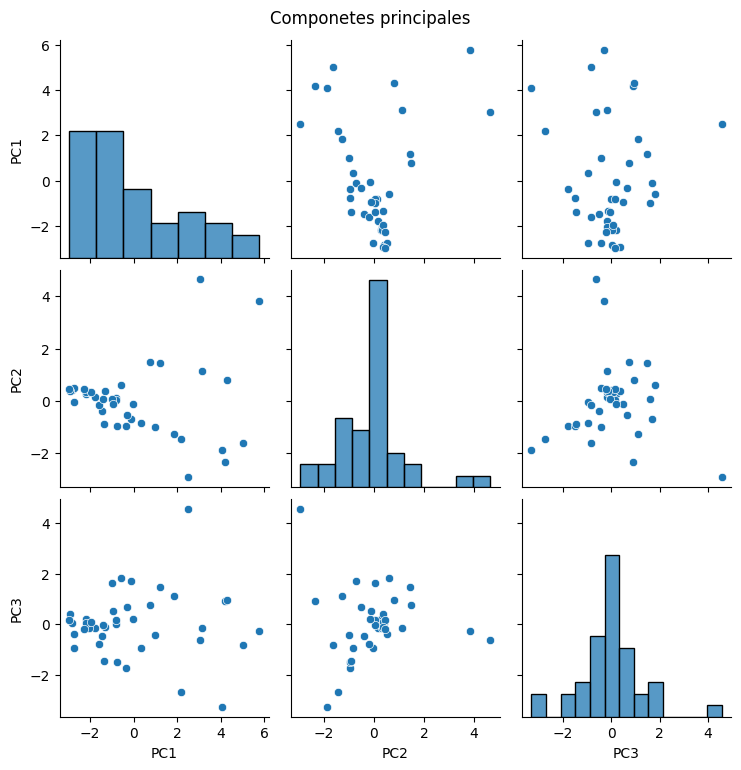

In [ ]:
sns.pairplot(final_df)
plt.suptitle('Componetes principales', y=1.02)
plt.show()

In [ ]:
final_df.to_csv('pc_promedio.csv', index=False)